# Prediksi `"Million Song Dataset"`

Pada kesempatan kali ini akan menjelaskan keseluruhan proses mengenai pemilihan dan pemanfaatan algoritma machine learning dan deep learning untuk prediksi tahun rilis lagu.

---

# Pertama akan dilakukan Load Data ke dalam Notebook

In [2]:
pip install gdown

In [3]:
import gdown

gdown.download("https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9")

Downloading...
From (original): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9
From (redirected): https://drive.google.com/uc?id=1f8eaAZY-7YgFxLcrL3OkvSRa3onNNLb9&confirm=t&uuid=09ff6936-6044-4446-9095-eca1dde83ad9
To: /content/midterm-regresi-dataset.csv
100%|██████████| 443M/443M [00:07<00:00, 56.4MB/s]


'midterm-regresi-dataset.csv'

**Selanjutnya:** Setelah Load berhasil dan data sudah tersimpan dalam path tersebut, maka kita bisa menampilkan isi dari data yang kita miliki, mengapa demikian? hal ini untuk kita tau apa bentuk data yang akan kita olah sebelum diberikan kedalam model

In [4]:
import pandas as pd


# Dataset ini tidak punya header.
# Nilai seperti 2001 di kolom pertama adalah TARGET (tahun), bukan nama feature /  kolom.
file_path = '/content/midterm-regresi-dataset.csv'
df = pd.read_csv(file_path)

df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [5]:
print("df.shape:", df.shape) #ada 515344 row/baris dan 90 feature

df.shape: (515344, 91)


# Preprocessing Data

Setelah data sudah diload, diketahui data tidak memiliki `header`, maka kita akan menambahkan `header` pada data. Untuk konteks dataset diketahui bahwa untuk kolom setelah penunjuk tahun tidak diketahui data tersebut berasal dari mana, sehingga yang bisa kita lakukan adalah berasumsi untuk sementara dan melabelinya dengan `fitur_1, fitur_2,` dan seterusnya.

**Code ini berfungsi untuk**:
Penambahan header pada dataset dan menampilkan rincian informasinya



In [6]:
df = pd.read_csv('/content/midterm-regresi-dataset.csv', header=None)

# Create a list of column names
col_names = ['years'] + [f'fitur_{i}' for i in range(1, 91)]

# Assign column names to the DataFrame
df.columns = col_names

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame:


,years,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,...,fitur_81,fitur_82,fitur_83,fitur_84,fitur_85,fitur_86,fitur_87,fitur_88,fitur_89,fitur_90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   years     515345 non-null  int64  
 1   fitur_1   515345 non-null  float64
 2   fitur_2   515345 non-null  float64
 3   fitur_3   515345 non-null  float64
 4   fitur_4   515345 non-null  float64
 5   fitur_5   515345 non-null  float64
 6   fitur_6   515345 non-null  float64
 7   fitur_7   515345 non-null  float64
 8   fitur_8   515345 non-null  float64
 9   fitur_9   515345 non-null  float64
 10  fitur_10  515345 non-null  float64
 11  fitur_11  515345 non-null  float64
 12  fitur_12  515345 non-null  float64
 13  fitur_13  515345 non-null  float64
 14  fitur_14  515345 non-null  float64
 15  fitur_15  515345 non-null  float64
 16  fitur_16  515345 non-null  float64
 17  fitur_17  515345 non-null  float64
 18  fitur_18  515345 non-null  float64
 19  fitur_19  515345 non-null  

# Data Cleaning

### Tujuan:
Identifikasi kesalahan pada input data, formatting, apakah ada yang hilang, serta ada outliers


**Langkah 1**:
Dilakukan pengecekan per kolom untuk mengetahui apakah ada data yang hilang di setiap masing masing kolong untuk nanti dihapus, setelahnya ditampilkan informasinya beserta hasil akhir setelah pengecekan dan penghapusan data yang hilang



In [7]:
print("Missing values before outlier handling:")
print(df.isnull().sum().to_string())

Missing values before outlier handling:
years       0
fitur_1     0
fitur_2     0
fitur_3     0
fitur_4     0
fitur_5     0
fitur_6     0
fitur_7     0
fitur_8     0
fitur_9     0
fitur_10    0
fitur_11    0
fitur_12    0
fitur_13    0
fitur_14    0
fitur_15    0
fitur_16    0
fitur_17    0
fitur_18    0
fitur_19    0
fitur_20    0
fitur_21    0
fitur_22    0
fitur_23    0
fitur_24    0
fitur_25    0
fitur_26    0
fitur_27    0
fitur_28    0
fitur_29    0
fitur_30    0
fitur_31    0
fitur_32    0
fitur_33    0
fitur_34    0
fitur_35    0
fitur_36    0
fitur_37    0
fitur_38    0
fitur_39    0
fitur_40    0
fitur_41    0
fitur_42    0
fitur_43    0
fitur_44    0
fitur_45    0
fitur_46    0
fitur_47    0
fitur_48    0
fitur_49    0
fitur_50    0
fitur_51    0
fitur_52    0
fitur_53    0
fitur_54    0
fitur_55    0
fitur_56    0
fitur_57    0
fitur_58    0
fitur_59    0
fitur_60    0
fitur_61    0
fitur_62    0
fitur_63    0
fitur_64    0
fitur_65    0
fitur_66    0
fitur_67    0
fitur_68

**Langkah 2**:
Karena tidak ada data yang hilang maka akan di cek untuk outliers atau pencilan. tujuannya adalah untuk menghilangkan yang terdapat pencilan karena akan berbahaya pada data dan menyulitkan model memahami konteks atau insight dari data yang kita punya



In [8]:
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

print("DataFrame after outlier handling (first 5 rows):")
display(df.head())

DataFrame after outlier handling (first 5 rows):


,years,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,...,fitur_81,fitur_82,fitur_83,fitur_84,fitur_85,fitur_86,fitur_87,fitur_88,fitur_89,fitur_90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


#  Standard Scaling

### Tujuan:
Memberikan standarisasi skala pada fitur yang akan digunakan, maka model akan lebih mudah memahami konteks data, sehingga dapat meningkatkan performa model dan memperkecil error hasil prediksi. Setelahnya juga menghilangkan kolom `years`, sehingga model hanya akan mempelajari pola dari data.

In [9]:
y = df['years']
X = df.drop('years', axis=1)

print("First 5 rows of features (X):")
display(X.head())

print("\nFirst 5 rows of target (y):")
display(y.head())

First 5 rows of features (X):


,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,fitur_10,...,fitur_81,fitur_82,fitur_83,fitur_84,fitur_85,fitur_86,fitur_87,fitur_88,fitur_89,fitur_90
0,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903



First 5 rows of target (y):


,years
0,2001
1,2001
2,2001
3,2001
4,2001


**Langkah selanjutnya**:
Pemisahan fitur dan target sudah dilakukan maka langkah selanjutnya adalah import `StandardScaler` dari `sklearn.preprocessing`, menginisialisasikan, mencocokannya dengan fitur data sebagai `X`, transformasi `X`, menampilkan beberapa baris awal dataset untuk mendapatkan gambaran sebelum dan sesudah penerapan `StandardScaler`



In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to X and transform X
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("First 5 rows of scaled features (X_scaled):")
display(X_scaled.head())


First 5 rows of scaled features (X_scaled):


,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,fitur_10,...,fitur_81,fitur_82,fitur_83,fitur_84,fitur_85,fitur_86,fitur_87,fitur_88,fitur_89,fitur_90
0,1.112485,0.397622,1.945061,0.558669,-0.493884,-0.278290,-1.649419,-1.398047,0.413709,-0.678833,...,-0.033271,0.094808,0.224528,-0.298001,0.038803,-0.468330,0.687365,-0.537783,-0.329912,0.090036
1,0.904488,0.334814,1.861896,0.851632,-0.169928,-1.241573,0.805808,0.117009,1.532557,0.423758,...,-0.335120,0.351123,-0.044286,0.077640,-0.781772,-0.572500,0.702763,0.735707,0.324435,1.559275
2,1.286512,0.612049,1.423255,0.884473,0.001402,-0.725547,-0.069702,-0.074531,1.256768,-0.075524,...,-0.443162,0.688740,-0.914400,-0.358578,-0.049631,0.287186,-0.666597,-0.375872,0.181497,-0.084356
3,0.821275,-0.084911,0.833065,0.128701,0.346802,-1.354739,0.535754,-1.144743,-0.024315,-1.287172,...,0.852270,-0.771037,-0.562523,-1.145425,-0.976306,0.736002,-0.349785,0.538892,1.400020,1.078605
4,1.288755,0.825837,1.764327,0.539079,-0.422821,-0.583147,-0.738661,-1.015518,0.905478,-0.147223,...,-0.160187,0.083354,0.286006,-0.750036,-0.155167,-0.290674,0.564517,0.353588,0.303370,1.668224


# Data Splitting
**Tujuan**:
Dilakukan splitting sebesar 40,40,20 untuk masing masing train (melatih), 40 untuk validate (validasi), dan 20 untuk test (pengujian). Dengan sistematika `DataSplitting` ini juga akan memperbesar performa model dalam memahami konteks data.

In [11]:
from sklearn.model_selection import train_test_split

# Split X_scaled and y into temporary training/validation set (80%) and test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Split the temporary set into final training set (40% of original) and validation set (40% of original)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (206138, 90)
Shape of X_val: (206138, 90)
Shape of X_test: (103069, 90)
Shape of y_train: (206138,)
Shape of y_val: (206138,)
Shape of y_test: (103069,)


## RFE Dimensionality Reduction

### Subtask:
Menggunakan Recursive Feature Elimination (RFE) untuk fitur dari dataset menggunakan regresi linier untuk memilih fitur mana saja yang relevan.


**Step By Step**:
1. Import classes untuk RFE dan regresi linier dari scikit learn
2. Inisiasi model regresi linier untuk esitmasi RFE
3. Inisialisasi RFE dengan jumlah yang terbatas untuk mengambil fitur dengan importance/relevance yang tinggi



In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Instantiate a Linear Regression model
estimator = LinearRegression()

# Initialize RFE with the estimator and set n_features_to_select
# A reasonable number for initial exploration could be 30 out of 90 features.
n_features_to_select = 30 # Can be tuned later
rfe = RFE(estimator=estimator, n_features_to_select=n_features_to_select, step=1)

print(f"Initialized RFE with LinearRegression estimator and n_features_to_select={n_features_to_select}")

Initialized RFE with LinearRegression estimator and n_features_to_select=30


**Selanjutnya**:
Karena RFE sudah di inisialisasi, maka RFE di berikan kepada model untuk training, lalu mengubah data train, validate, dan test menggunakan model yang sudah diberikan RFE. Setelahnya menampilkan shape dari dataset seletah proses tadi untuk mengkonfirmasi jumlah dan fitur mana saja yang digunakan.



In [13]:
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_val_rfe = rfe.transform(X_val)
X_test_rfe = rfe.transform(X_test)

print("Shape of X_train_rfe:", X_train_rfe.shape)
print("Shape of X_val_rfe:", X_val_rfe.shape)
print("Shape of X_test_rfe:", X_test_rfe.shape)

Shape of X_train_rfe: (206138, 30)
Shape of X_val_rfe: (206138, 30)
Shape of X_test_rfe: (103069, 30)


## Polynomial Feature Transformation

### Tujuan:
* Mengubah dataset dengan fitur hasil RFE untuk training, validation, dan test
* Menyiapkan data untuk regresi polinomial



In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate PolynomialFeatures with degree=2
degree = 2  # This can be tuned later
poly = PolynomialFeatures(degree=degree)

# Fit and transform the training data
X_train_poly = poly.fit_transform(X_train_rfe)

# Transform the validation and test data
X_val_poly = poly.transform(X_val_rfe)
X_test_poly = poly.transform(X_test_rfe)

print(f"Polynomial feature transformation with degree={degree}:")
print("Shape of X_train_poly:", X_train_poly.shape)
print("Shape of X_val_poly:", X_val_poly.shape)
print("Shape of X_test_poly:", X_test_poly.shape)

Polynomial feature transformation with degree=2:
Shape of X_train_poly: (206138, 496)
Shape of X_val_poly: (206138, 496)
Shape of X_test_poly: (103069, 496)


## Hyperparameter Tuning for Polynomial Regression (Degree <= 2)

### Subtask:

Ulangi melalui derajat polinomial 1 dan 2, latih model Regresi Linier untuk masing-masing, evaluasi kinerjanya pada set validasi menggunakan Mean Squared Error, dan identifikasi derajat optimal.


**Proses**:
Untuk memulai penyetelan hiperparameter, impor `library` yang diperlukan, menentukan rentang derajat polinomial yang akan diuji, lalu membuat perulangan untuk melatih dan mengevaluasi model Regresi Linier untuk setiap derajat. Saya akan menyimpan Mean Squared Error untuk setiap derajat guna menentukan derajat optimal.



In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

mse_results = {}

degrees = [1, 2]

for degree in degrees:
    print(f"\n--- Evaluating Polynomial Degree: {degree} ---")

    # Instantiate PolynomialFeatures with the current degree
    poly_current = PolynomialFeatures(degree=degree)

    # Fit and transform training data
    X_train_poly_current_degree = poly_current.fit_transform(X_train_rfe)

    # Transform validation data
    X_val_poly_current_degree = poly_current.transform(X_val_rfe)

    # Instantiate and train Linear Regression model
    model = LinearRegression()
    model.fit(X_train_poly_current_degree, y_train)

    # Make predictions on the validation set
    y_pred_val = model.predict(X_val_poly_current_degree)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_val, y_pred_val)
    mse_results[degree] = mse

    print(f"Mean Squared Error for degree {degree}: {mse:.4f}")

# Identify the optimal degree
optimal_degree = min(mse_results, key=mse_results.get)
min_mse = mse_results[optimal_degree]

print(f"\nOptimal polynomial degree: {optimal_degree} with MSE: {min_mse:.4f}")


--- Evaluating Polynomial Degree: 1 ---
Mean Squared Error for degree 1: 65.4015

--- Evaluating Polynomial Degree: 2 ---
Mean Squared Error for degree 2: 59.8950

Optimal polynomial degree: 2 with MSE: 59.8950


# Evaluasi Performa Model

### Subtask:
Akan ditampilkan performa model RFE untuk dimensional reduction dan polynomial regression sebagai metode model, diperoleh seperti berikut

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def hyperparameter_tuning(degree):
  print(f"\n--- Evaluating Polynomial Degree: {degree} ---")

  # Instantiate PolynomialFeatures with the current degree
  poly_current = PolynomialFeatures(degree=degree)

  # Fit and transform training data
  X_train_poly_current_degree = poly_current.fit_transform(X_train_rfe)

  # Transform validation data
  X_val_poly_current_degree = poly_current.transform(X_val_rfe)

  # Instantiate and train Linear Regression model
  model = LinearRegression()
  model.fit(X_train_poly_current_degree, y_train)

  # Make predictions on the validation set
  y_pred_val = model.predict(X_val_poly_current_degree)

  # Calculate Mean Squared Error
  mse = mean_squared_error(y_val, y_pred_val)
  mse_results[degree] = mse

  print(f"Mean Squared Error for degree {degree}: {mse:.4f}")

  # Identify the optimal degree
  optimal_degree = min(mse_results, key=mse_results.get)
  min_mse = mse_results[optimal_degree]

  print(f"\nOptimal polynomial degree: {optimal_degree} with MSE: {min_mse:.4f}")

  # 1. Instantiate PolynomialFeatures with the optimal_degree
  poly_final = PolynomialFeatures(degree=optimal_degree)

  # 2. Transform X_train_rfe using the instantiated PolynomialFeatures
  X_train_final_poly = poly_final.fit_transform(X_train_rfe)

  # 3. Transform X_test_rfe using the same instantiated PolynomialFeatures
  X_test_final_poly = poly_final.transform(X_test_rfe)

  # 4. Instantiate a LinearRegression model
  final_model = LinearRegression()

  # 5. Train the LinearRegression model using X_train_final_poly and y_train
  final_model.fit(X_train_final_poly, y_train)

  # 6. Make predictions on the X_test_final_poly data
  y_pred_test = final_model.predict(X_test_final_poly)

  # 7. Calculate the Mean Squared Error (MSE)
  mse_test = mean_squared_error(y_test, y_pred_test)

  # 8. Calculate the R-squared score
  r2_test = r2_score(y_test, y_pred_test)

  # 9. Print the calculated MSE and R-squared values for the test set
  print(f"\nFinal Model Evaluation on Test Set (Polynomial Degree = {optimal_degree}):")
  print(f"Mean Squared Error (MSE): {mse_test:.4f}")
  print(f"R-squared (R2): {r2_test:.4f}")


In [18]:
hyperparameter_tuning(1)
hyperparameter_tuning(2)


--- Evaluating Polynomial Degree: 1 ---
Mean Squared Error for degree 1: 65.4015

Optimal polynomial degree: 2 with MSE: 59.8950

Final Model Evaluation on Test Set (Polynomial Degree = 2):
Mean Squared Error (MSE): 59.5699
R-squared (R2): 0.3263

--- Evaluating Polynomial Degree: 2 ---
Mean Squared Error for degree 2: 59.8950

Optimal polynomial degree: 2 with MSE: 59.8950

Final Model Evaluation on Test Set (Polynomial Degree = 2):
Mean Squared Error (MSE): 59.5699
R-squared (R2): 0.3263


# Kenapa Performa Model sangat Rendah?

Hal ini disebabkan oleh beberapa faktor seperti,
* Model sangat terbatas pada aturan yang diterapkan, seperti pada code diatas performansi sebesar `0.3263` sangat rendah, karena trend algoritma terbilang sederhana untuk dataset yang rumit, menjelaskan pada point setelahnya, yaitu.
* Dataset terbilang **sangat rumit dan jumlah yang sangat besar**, sehingga untuk model sederhana seperti regresi liniear dan polinomial kurang bisa menangkap karakteristik data melalui rumus matematika, sehingga harus menggunakan model yang lebih advanced lagi jika ingin menaikan perfoma secara signifikan

# Apa yang kita hadapi?

1. Nama Dataset: Million Song Dataset (YearPredictionMSD).
2. Konteks Fitur: Ini adalah fitur Audio Timbre (12 rata-rata + 78 kovarians).
3. Masalah: Memprediksi Tahun Rilis Lagu berdasarkan karakteristik suaranya.

##Reality Check: Seberapa Sulit Dataset Ini?
Jujur saja, ini adalah salah satu dataset regresi yang paling susah di dunia Machine Learning.
* Hubungan antara "suara" (Timbre) dan "tahun rilis" itu sangat lemah dan abstrak. Tidak ada rumus pasti bahwa "suara nge-bass = tahun 2000".
* Benchmark Industri: Para peneliti dan ahli data science biasanya "hanya" bisa mencapai $R^2$ sekitar 0.30 - 0.35 atau RMSE sekitar 8 - 9 tahun untuk dataset ini menggunakan metode konvensional (non-Deep Learning).

Jadi, hasil $R^2$ yang tadi 0.32 itu  **SUDAH BAGUS **(sudah setara standar rata-rata).Tapi, apakah bisa dinaikkan lagi? Bisa, tapi sedikit. Karena datanya padat (dense) dan kontinyu (desimal kecil), strategi kita harus berubah dari "menangani angka nol" menjadi "menangani nuansa kecil".

## Strategi Baru: LightGBM / HistGradientBoosting

Karena datanya berupa desimal padat dan jumlah barisnya kemungkinan besar banyak (ribuan/jutaan), XGBoost mungkin agak lambat, dan Polinomial tidak akan sanggup menangkap nuansa Timbre.

Senjata terbaik untuk dataset Million Song ini adalah LightGBM atau HistGradientBoosting. Algoritma ini dirancang khusus untuk membedakan nilai desimal yang sangat rapat (misal beda antara 0.021 dan 0.022).

Berikut kode optimasi terakhir yang bisa saya tawarkan. Jika ini mentok juga, berarti memang batas maksimal informasi yang bisa diambil dari fitur Timbre tersebut sudah tercapai.

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Kita pakai HistGradientBoosting (Versi scikit-learn dari LightGBM)
# Ini jauh lebih cepat dan akurat untuk data desimal padat
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. SETUP DATA
# Pastikan X dan y sudah siap
# X sekarang akan berisi semua fitur kecuali 'years'
# y adalah kolom 'years' yang merupakan target kita
X = df.drop('years', axis=1)  # Semua Fitur Timbre
y = df['years']   # Target Tahun

# 2. SPLIT DATA
# MSD biasanya punya split spesifik (463.715 train, 51.630 test).
# Tapi kalau pakai random split biasa juga tidak apa-apa.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 3. MODELING (HistGradientBoosting)
# Algoritma ini membungkus data desimal ke dalam 'bin' (keranjang) histogram
# Sangat cocok untuk fitur audio timbre yang nilainya rapat
model = HistGradientBoostingRegressor(
    max_iter=1000,        # Jumlah iterasi (pohon)
    learning_rate=0.1,    # Kecepatan belajar standar
    max_depth=10,         # Kedalaman pohon (bisa diperdalam karena datanya kompleks)
    l2_regularization=0.1,# Mencegah overfitting
    random_state=42,
    verbose=1             # Biar kelihatan prosesnya
)

print("Training dimulai...")
model.fit(X_train, y_train)

# 4. EVALUASI
y_pred = model.predict(X_test)

# Kita bulatkan prediksi ke integer terdekat (karena Tahun tidak mungkin desimal)
y_pred_rounded = np.round(y_pred)

r2 = r2_score(y_test, y_pred_rounded)
# Calculate MSE first, then take the square root for RMSE
mse = mean_squared_error(y_test, y_pred_rounded)
rmse = np.sqrt(mse)

print(f"\n--- HASIL AKHIR (Million Song Dataset) ---")
print(f"R-Squared: {r2:.4f}")
print(f"RMSE: {rmse:.4f} Tahun")

# Analisis Error
errors = np.abs(y_test - y_pred_rounded)
print(f"Rata-rata Meleset: {np.mean(errors):.2f} Tahun")

Training dimulai...
Binning 0.301 GB of training data: 6.378 s
Binning 0.033 GB of validation data: 0.577 s
Fitting gradient boosted rounds:
Fit 780 trees in 149.338 s, (24180 total leaves)
Time spent computing histograms: 118.398s
Time spent finding best splits:  8.887s
Time spent applying splits:      6.933s
Time spent predicting:           1.037s

--- HASIL AKHIR (Million Song Dataset) ---
R-Squared: 0.3777
RMSE: 7.4123 Tahun
Rata-rata Meleset: 5.51 Tahun


# Hasil prediksi dari HistBGM dan polinomial

Selanjutnya kita bandingkan hasil kedua model untuk menentukan model mana yang akan di gunakan di akhirnya

In [20]:
# Ambil 3 baris pertama dari DataFrame asli
sample_data_comparison = df.head(8).copy()

# Target aktual
actual_years = sample_data_comparison['years'].values

# --- Prediksi dari HistGradientBoostingRegressor ---
# Siapkan fitur untuk HistGradientBoostingRegressor (tanpa scaling atau RFE pada tahap prediksi sampel ini)
X_sample_histgb = sample_data_comparison.drop('years', axis=1)
predictions_histgb = model.predict(X_sample_histgb)
predictions_histgb_rounded = np.round(predictions_histgb)

# --- Prediksi dari Polynomial Regression + RFE ---
# 1. Transformasi RFE pada data sampel (perlu di-scale dulu)
X_sample_rfe_for_poly = rfe.transform(scaler.transform(sample_data_comparison.drop('years', axis=1)))
# 2. Transformasi Polinomial pada data sampel yang sudah di-RFE
X_sample_final_poly_for_poly = poly_final.transform(X_sample_rfe_for_poly)
# 3. Lakukan prediksi menggunakan final_model (Polynomial Regression)
predictions_poly_model = final_model.predict(X_sample_final_poly_for_poly)
predictions_poly_rounded_model = np.round(predictions_poly_model)

# Buat DataFrame perbandingan
comparison_df_final = pd.DataFrame({
    'Actual_Years': actual_years,
    'Predicted_HistGB': predictions_histgb_rounded,
    'Predicted_Polynomial': predictions_poly_rounded_model
})

print("\n--- Perbandingan Prediksi HistGradientBoosting vs Polynomial Regression (3 Baris Awal) ---")
display(comparison_df_final)

print("\n--- Kesimpulan Performa Model ---")
print(f"R-squared HistGradientBoosting: {r2:.4f}")
print(f"R-squared Polynomial Regression: {r2_test:.4f}")

if r2 > r2_test:
    print("\nBerdasarkan nilai R-squared, model HistGradientBoostingRegressor memiliki performa yang jauh lebih baik.\nIni dapat menjelaskan lebih banyak variasi dalam data tahun rilis lagu (sekitar {r2*100:.2f}%) dibandingkan Polynomial Regression (sekitar {r2_test*100:.2f}%). Hal ini juga terlihat dari prediksi sampel yang cenderung lebih mendekati nilai aktual untuk HistGradientBoosting.")
else:
    print("\nBerdasarkan nilai R-squared, model Polynomial Regression memiliki performa yang lebih baik.\nIni dapat menjelaskan lebih banyak variasi dalam data tahun rilis lagu (sekitar {r2_test*100:.2f}%) dibandingkan HistGradientBoosting (sekitar {r2*100:.2f}%).")


--- Perbandingan Prediksi HistGradientBoosting vs Polynomial Regression (3 Baris Awal) ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


,Actual_Years,Predicted_HistGB,Predicted_Polynomial
0,2001,1997.0,1997.0
1,2001,1997.0,1999.0
2,2001,1998.0,1998.0
3,2001,2000.0,2002.0
4,2001,1999.0,1999.0
5,2001,1999.0,1999.0
6,2001,2002.0,2002.0
7,2001,1994.0,1996.0



--- Kesimpulan Performa Model ---
R-squared HistGradientBoosting: 0.3777
R-squared Polynomial Regression: 0.3263

Berdasarkan nilai R-squared, model HistGradientBoostingRegressor memiliki performa yang jauh lebih baik.
Ini dapat menjelaskan lebih banyak variasi dalam data tahun rilis lagu (sekitar {r2*100:.2f}%) dibandingkan Polynomial Regression (sekitar {r2_test*100:.2f}%). Hal ini juga terlihat dari prediksi sampel yang cenderung lebih mendekati nilai aktual untuk HistGradientBoosting.


### Apakah ada bentuk model lain yang tidak direct dengan prediksi namun lebih efektif dan ringan?

ada contohnya adalah prediksi apakah sebuah lagu itu sebelum tahun 2000? atau setelahnya? atau pada tahun 2000?, namun karena petunjuk pengerjaan mengacu pada prediksi dan pembagian berikut bukan lagi prediksi namun sudah masuk ke klasifikasi, selain itu performansi juga di pengaruhi oleh `trend line` dari kedua sifat algoritma dijelaskan pada gambar berikut.

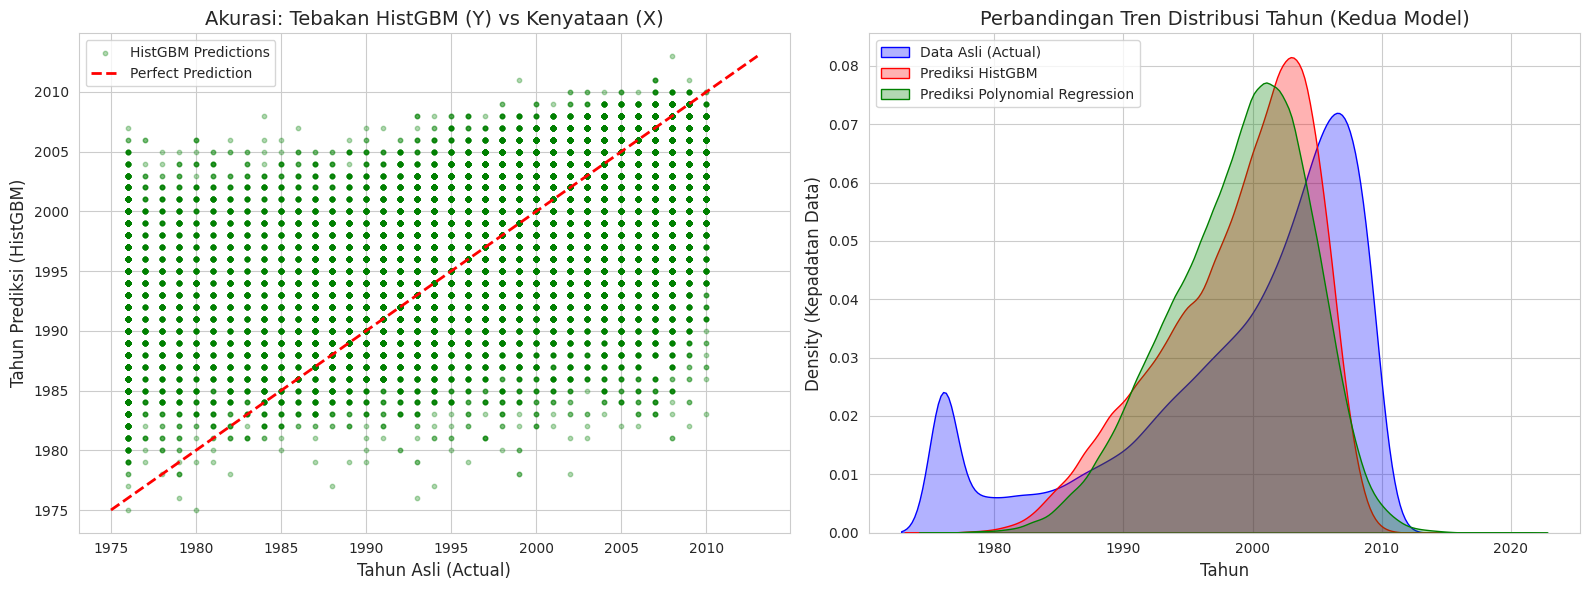

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan y_test, y_pred (dari HistGBM), dan y_pred_poly_for_plotting_rounded (dari Polynomial)
# sudah ada dari kode sebelumnya dan sesuai untuk test set yang sama.

# Buat DataFrame untuk scatter plot (akan tetap fokus pada HistGBM untuk scatter plot agar tidak terlalu padat)
results_histgb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rounded}) # Menggunakan y_pred_rounded dari HistGBM

# Setting gaya visualisasi biar aesthetic
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))

# --- GRAFIK 1: SCATTER PLOT (AKURASI HISTGBM) ---
# Ini menunjukkan seberapa 'meleset' tebakan kita untuk HistGBM
plt.subplot(1, 2, 1)
# Plot titik-titik (gunakan alpha rendah biar kalau numpuk kelihatan)
plt.scatter(results_histgb['Actual'], results_histgb['Predicted'], alpha=0.3, color='green', s=10, label='HistGBM Predictions')

# Bikin Garis Merah Diagonal (Garis Sempurna)
# Kalau titiknya nempel di garis merah ini, berarti tebakan 100% benar
min_val_sc = min(results_histgb['Actual'].min(), results_histgb['Predicted'].min())
max_val_sc = max(results_histgb['Actual'].max(), results_histgb['Predicted'].max())
plt.plot([min_val_sc, max_val_sc], [min_val_sc, max_val_sc], color='red', linewidth=2, linestyle='--', label='Perfect Prediction')

plt.title('Akurasi: Tebakan HistGBM (Y) vs Kenyataan (X)', fontsize=14)
plt.xlabel('Tahun Asli (Actual)', fontsize=12)
plt.ylabel('Tahun Prediksi (HistGBM)', fontsize=12)
plt.legend()


# --- GRAFIK 2: DISTRIBUTION PLOT (TREN KEDUA MODEL) ---
# Ini yang mirip grafik "Gradient Biru" kamu tadi
# Membandingkan apakah kedua model tahu tren "Lagu jaman dulu dikit, lagu baru banyak"
plt.subplot(1, 2, 2)

# Kurva Data Asli (Biru)
sns.kdeplot(y_test, color='blue', fill=True, label='Data Asli (Actual)', alpha=0.3)
# Kurva Prediksi HistGBM (Merah)
sns.kdeplot(y_pred_rounded, color='red', fill=True, label='Prediksi HistGBM', alpha=0.3)
# Kurva Prediksi Polynomial (Hijau)
sns.kdeplot(y_pred_poly_for_plotting_rounded, color='green', fill=True, label='Prediksi Polynomial Regression', alpha=0.3)

plt.title('Perbandingan Tren Distribusi Tahun (Kedua Model)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Density (Kepadatan Data)', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()